# 📊 Sesión 3: Representación Numérica de Texto con TF-IDF

En esta sesión aprenderemos cómo convertir documentos de texto en vectores numéricos usando el esquema TF-IDF (Term Frequency - Inverse Document Frequency). Esta técnica es una de las más utilizadas en modelos clásicos de NLP para clasificación, clustering o recomendación.

## 🎯 Objetivos de la sesión
- Comprender qué es TF-IDF y cómo se calcula.
- Aplicar la vectorización TF-IDF sobre un conjunto de documentos.
- Visualizar la matriz TF-IDF y explorar el vocabulario generado.
- Utilizar un corpus más robusto de ejemplo para observar su impacto.

_________

# TF-IDF

## Introducción

TF-IDF (Term Frequency-Inverse Document Frequency) es una técnica de procesamiento de texto que se utiliza para evaluar la importancia de una palabra en un documento. Esta técnica se basa en dos conceptos:

- **Frecuencia de término (TF)**: mide la frecuencia con la que una palabra aparece en un documento. La fórmula para calcular la frecuencia de término es la siguiente:

$$TF(t,d) = \frac{Número\ de\ veces\ que\ la\ palabra\ t\ aparece\ en\ un\ documento}{Número\ total\ de\ palabras\ en\ el\ documento}$$

- **Frecuencia inversa de documento (IDF)**: mide la importancia de una palabra en un conjunto de documentos. La fórmula para calcular la frecuencia inversa de documento es la siguiente:

$$IDF(t,D) = \log\left(\frac{Número\ total\ de\ documentos}{Número\ de\ documentos\ que\ contienen\ la\ palabra\ t}\right)$$

El valor de TF-IDF se calcula multiplicando la frecuencia de término por la frecuencia inversa de documento:

$$TF-IDF(t,d,D) = TF(t,d) \times IDF(t,D)$$

Siendo $t$ el término, $d$ el documento y $D$ es el conjunto de todos los documentos en el corpus.


In [ ]:
### librerias necesarias TF-IDF

import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer


### Descargar stopwords
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Miguel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Miguel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 📄 2. Cargar el texto

Para este ejercicio inicial usaremos un texto sencillo, el cual se cargará en una variable.

In [1]:
texto_1 = """Hace varios años, en el pelotón de fusilamiento, el coronel Aureliano Buendía había de recordar aquella tarde remota en que su padre lo llevó a conocer el hielo. """
texto_2 = """Hace tanto tiempo que no me acuerdo de nada, pero recuerdo que mi padre me llevó a conocer el hielo. """
texto_3 = """Hace tiempo que ocurrió la era de hielo, ahorita que solo soy un  perezoso recuerdo aquellos días tan bellos con mis amigos, un mamut y un dientes de sable. """

corpus = [texto_1, texto_2, texto_3]

## 🤖 3. Calcular TF-IDF

## 🔗 ¿Qué son los N-grams?

Un **n-grama** (o *n-gram*) es una secuencia de `n` palabras consecutivas en un texto. Son útiles para capturar **contexto** y **relaciones entre palabras** que no se pueden identificar con tokens individuales.

### 📌 Ejemplos

Dado el texto:

> "el hotel es muy limpio"

- **Unigrama (n=1):**
  - `['el', 'hotel', 'es', 'muy', 'limpio']`

- **Bigramas (n=2):**
  - `['el hotel', 'hotel es', 'es muy', 'muy limpio']`

- **Trigramas (n=3):**
  - `['el hotel es', 'hotel es muy', 'es muy limpio']`

> ⚠️ A mayor valor de `n`, más contexto se capta, pero también se incrementa el número de características posibles y la dispersión.

---

## 🛠 Ejemplo en Python con TfidfVectorizer

A continuación se muestra cómo utilizar `TfidfVectorizer` con diferentes valores de `ngram_range`:

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Lista de textos de ejemplo
corpus = [
    "el hotel es muy limpio",
    "la habitación del hotel era cómoda",
    "el personal fue amable y atento"
]

###  📚 ¿Qué es `ngram_range`?

El parámetro `ngram_range` se utiliza en clases como `CountVectorizer` o `TfidfVectorizer` para definir cuántas palabras consecutivas (n-gramas) se deben considerar al transformar el texto en vectores.

#### 📌 Ejemplos:

`ngram_range=(1, 1)` → Solo unigrama (palabras individuales)

`ngram_range=(1, 2)` → Unigramas y bigramas

`ngram_range=(2, 2)` → Solo bigramas

`ngram_range=(2, 3)` → Bigramas y trigramas

In [3]:
# Unigramas
vectorizer_uni = TfidfVectorizer(ngram_range=(1,1))
X_uni = vectorizer_uni.fit_transform(corpus)
vocabulario = vectorizer_uni.get_feature_names_out()
print("🔹 Unigrama features:", vocabulario)

🔹 Unigrama features: ['amable' 'atento' 'cómoda' 'del' 'el' 'era' 'es' 'fue' 'habitación'
 'hotel' 'la' 'limpio' 'muy' 'personal']


In [4]:
for i, texto in enumerate(corpus):
    print(f"📝 Texto {i+1}: {texto}")
    indices = X_uni[i].nonzero()[1]
    ngrams = [vocabulario[j] for j in indices]
    print(f"👉 {1}-gramas: {ngrams}\n")

📝 Texto 1: el hotel es muy limpio
👉 1-gramas: ['el', 'hotel', 'es', 'muy', 'limpio']

📝 Texto 2: la habitación del hotel era cómoda
👉 1-gramas: ['hotel', 'la', 'habitación', 'del', 'era', 'cómoda']

📝 Texto 3: el personal fue amable y atento
👉 1-gramas: ['el', 'personal', 'fue', 'amable', 'atento']



In [5]:
# Bigramas
vectorizer_bi = TfidfVectorizer(ngram_range=(2, 2))
X_bi = vectorizer_bi.fit_transform(corpus)
vocabulario_bi = vectorizer_bi.get_feature_names_out()
print("🔹 Bigramas:", vocabulario_bi)

🔹 Bigramas: ['amable atento' 'del hotel' 'el hotel' 'el personal' 'era cómoda'
 'es muy' 'fue amable' 'habitación del' 'hotel era' 'hotel es'
 'la habitación' 'muy limpio' 'personal fue']


In [6]:
X_bi[0].nonzero()[1]

array([ 2,  9,  5, 11], dtype=int32)

In [7]:
X_bi[0].toarray()

array([[0. , 0. , 0.5, 0. , 0. , 0.5, 0. , 0. , 0. , 0.5, 0. , 0.5, 0. ]])

In [8]:
for i, texto in enumerate(corpus):
    print(f"📝 Texto {i+1}: {texto}")
    indices = X_bi[i].nonzero()[1]
    ngrams = [vocabulario_bi[j] for j in indices]
    print(f"👉 {2}-gramas: {ngrams}\n")

📝 Texto 1: el hotel es muy limpio
👉 2-gramas: ['el hotel', 'hotel es', 'es muy', 'muy limpio']

📝 Texto 2: la habitación del hotel era cómoda
👉 2-gramas: ['la habitación', 'habitación del', 'del hotel', 'hotel era', 'era cómoda']

📝 Texto 3: el personal fue amable y atento
👉 2-gramas: ['el personal', 'personal fue', 'fue amable', 'amable atento']



In [9]:
# Unigramas + Bigramas combinados
vectorizer_uni_bi = TfidfVectorizer(ngram_range=(1, 2))
X_uni_bi = vectorizer_uni_bi.fit_transform(corpus)
vocabulario_uni_bi = vectorizer_uni_bi.get_feature_names_out()
print("🔹 Uni + Bi:", vocabulario_uni_bi)


🔹 Uni + Bi: ['amable' 'amable atento' 'atento' 'cómoda' 'del' 'del hotel' 'el'
 'el hotel' 'el personal' 'era' 'era cómoda' 'es' 'es muy' 'fue'
 'fue amable' 'habitación' 'habitación del' 'hotel' 'hotel era' 'hotel es'
 'la' 'la habitación' 'limpio' 'muy' 'muy limpio' 'personal'
 'personal fue']


In [10]:
for i, texto in enumerate(corpus):
    print(f"📝 Texto {i+1}: {texto}")
    indices = X_uni_bi[i].nonzero()[1]
    ngrams = [vocabulario_uni_bi[j] for j in indices]
    print(f"👉 {1}-gramas: {ngrams}\n")

📝 Texto 1: el hotel es muy limpio
👉 1-gramas: ['el', 'hotel', 'es', 'muy', 'limpio', 'el hotel', 'hotel es', 'es muy', 'muy limpio']

📝 Texto 2: la habitación del hotel era cómoda
👉 1-gramas: ['hotel', 'la', 'habitación', 'del', 'era', 'cómoda', 'la habitación', 'habitación del', 'del hotel', 'hotel era', 'era cómoda']

📝 Texto 3: el personal fue amable y atento
👉 1-gramas: ['el', 'personal', 'fue', 'amable', 'atento', 'el personal', 'personal fue', 'fue amable', 'amable atento']



In [ ]:
corpus = ["el personal fue amable y atento"]

vectorizer = TfidfVectorizer(ngram_range=(2, 2), token_pattern=r"(?u)\b\w+\b") #unicode (ñ) palabras de al menos 1 caracter 
X = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names_out())


['amable y' 'el personal' 'fue amable' 'personal fue' 'y atento']


### 🎯 ¿Cuándo usar n-grams?

✅ Unigrama: es suficiente cuando hay palabras fuertes con alto peso individual.

✅ Bigramas o trigramas: útiles cuando hay frases comunes que aportan más que las palabras por separado, como: "muy bueno", "no recomendable", "excelente ubicación".

____ 
Ahora sí el **TF-IDF**

In [19]:
corpus = [texto_1, texto_2, texto_3]

In [20]:
##################### TF-IDF #####################
# Crear un objeto de la clase TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,2))

# Ajustar el objeto a los datos y transformarlos

tfidf_matrix = tfidf.fit_transform(corpus)

# Obtener los nombres de las palabras

words = tfidf.get_feature_names_out()

# Crear un DataFrame con los resultados

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=words)
tfidf_df

,acuerdo,acuerdo de,ahorita,ahorita que,amigos,amigos un,aquella,aquella tarde,aquellos,aquellos días,...,tarde,tarde remota,tiempo,tiempo que,un,un dientes,un mamut,un perezoso,varios,varios años
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.138518,0.138518,0.000000,0.000000,...,0.138518,0.138518,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.138518,0.138518
1,0.176156,0.176156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.133971,0.133971,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.132194,0.132194,0.132194,0.132194,0.000000,0.000000,0.132194,0.132194,...,0.000000,0.000000,0.100537,0.100537,0.396583,0.132194,0.132194,0.132194,0.000000,0.000000


In [9]:
tfidf_df[['hace','hielo','padre','años','coronel','mamut','nada']]

,hace,hielo,padre,años,coronel,mamut,nada
0,0.081811,0.081811,0.105347,0.138518,0.138518,0.000000,0.000000
1,0.104041,0.104041,0.133971,0.000000,0.000000,0.000000,0.176156
2,0.078076,0.078076,0.000000,0.000000,0.000000,0.132194,0.000000


**Nota:** Observe que el valor de TF-IDF es más alto para las palabras que son más importantes en un documento. Por ejemplo, en el documento de ejemplo, el valor de TF-IDF es más alto para las palabras "años" y "nada" que para las palabras "hace" y "padre".

También observe que cada documento tiene un vector de TF-IDF asociado, correspondiente a la fila de la matriz de términos. Así mismo, cada columna de la matriz de términos corresponde a un término en el vocabulario. Esta matriz se puede utilizar para entrenar un modelo de aprendizaje automático, como un clasificador de texto o un sistema de recomendación.

### 👀 Debemos tener cuidado con las StopWords

#### 📝 ¿Qué son las stop words?
Palabras vacías o palabras de parada son palabras muy frecuentes en un idioma (como "el", "es", "y") que generalmente se eliminan durante el procesamiento del lenguaje natural, ya que por sí solas no aportan mucho valor semántico para tareas como análisis de texto, búsqueda o clasificación.

##### 🔤 Ejemplos comunes de stop words
**En español**:
el, la, los, las
de, del, en, por, para
y, o, pero, que, como
es, fue, ha, había, son

**En inglés**:
the, a, an
in, on, at, by
is, are, was, were
and, or, but, that


In [21]:
tfidf_2 = TfidfVectorizer(stop_words=stopwords.words('spanish'),ngram_range=(1,2))
tfidf_matrix_2 = tfidf_2.fit_transform(corpus)
words_2 = tfidf_2.get_feature_names_out()
tfidf_df_2 = pd.DataFrame(tfidf_matrix_2.toarray(), columns=words_2)
tfidf_df_2

,acuerdo,acuerdo recuerdo,ahorita,ahorita solo,amigos,amigos mamut,aquella,aquella tarde,aquellos,aquellos días,...,solo perezoso,tan,tan bellos,tarde,tarde remota,tiempo,tiempo acuerdo,tiempo ocurrió,varios,varios años
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.191854,0.191854,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.191854,0.191854,0.000000,0.000000,0.000000,0.191854,0.191854
1,0.317769,0.317769,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.241671,0.317769,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.187538,0.187538,0.187538,0.187538,0.000000,0.000000,0.187538,0.187538,...,0.187538,0.187538,0.187538,0.000000,0.000000,0.142628,0.000000,0.187538,0.000000,0.000000


In [22]:
# tfidf_df[['hace','hielo','padre','años','coronel','mamut','nada']]
tfidf_df_2[['hace','hielo','padre','años','coronel','mamut']]

,hace,hielo,padre,años,coronel,mamut
0,0.113312,0.113312,0.145910,0.191854,0.191854,0.000000
1,0.187679,0.187679,0.241671,0.000000,0.000000,0.000000
2,0.110763,0.110763,0.000000,0.000000,0.000000,0.187538


##### 🧠 ¿Cuándo se eliminan?
Cuando avanzas tareas de NLP como:
- Clasificación de documentos
- Recuperación de información


##### ✅ Cuándo conservar las stop words en NLP
1. Cuando el significado depende de ellas
Algunas tareas requieren entender la estructura o el contexto gramatical que aportan las stop words:

📍Ejemplos:
- **Análisis de sentimiento**: Frases como "no me gusta" o "no es bueno" tienen stop words (“no”, “es”) que cambian totalmente el significado.
- **Detección de negaciones**: El “no” es esencial. Eliminarlo puede invertir el sentido del texto.

2. Cuando se usan modelos secuenciales o basados en contexto
Modelos como: Transformers (BERT, GPT, etc.) RNNs / LSTMs
Necesitan ver el texto completo para entender el contexto y el orden. Las stop words ayudan a preservar la fluidez y el significado completo.

3. Cuando trabajas con embeddings preentrenados
Palabras como "is", "the", "of" ya tienen representaciones vectoriales útiles en modelos como Word2Vec, GloVe, BERT.
Eliminarlas podría hacer perder parte de la representación semántica global de una oración.

4. Para tareas de resumen o generación de texto
Si estás generando texto (resúmenes, respuestas, títulos), eliminar stop words da lugar a frases no naturales.

5. En búsquedas o consultas naturales
Motores de búsqueda modernos a veces conservan stop words para entender mejor la intención del usuario:  
Buscar: "To be or not to be"
No tendría sentido sin las palabras de parada.


# 🔄 TfidfTransformer vs. TfidfVectorizer

Ya hemos visto la manera de calcular el TF-IDF de ciertos documentos, pero esta no es la únicamanera de hacerlo y vamos a comprender lo que realmente hace la librería

## 📄 Documentos

In [23]:
docs = ["la casa tenía un ratoncito diminuto", # 6 todas
"el gato vio al ratón", # 5 todas
"el ratón se escapó de la casa", # 3 se escapó de
"el gato finalmente se comió al ratón", # 2 finalmente comió
"el final de la historia del ratón" # 3 final historia del
]

## 📘 Opción 1: TfidfVectorizer (todo en uno)

In [24]:
vectorizer = TfidfVectorizer()
X_vect = vectorizer.fit_transform(docs)

# Convertimos a DataFrame para verlo bonito
df_vect = pd.DataFrame(X_vect.toarray(), columns=vectorizer.get_feature_names_out())
print("✅ TF-IDF con TfidfVectorizer:\n")
df_vect.round(2)


✅ TF-IDF con TfidfVectorizer:



,al,casa,comió,de,del,diminuto,el,escapó,final,finalmente,gato,historia,la,ratoncito,ratón,se,tenía,un,vio
0,0.00,0.36,0.00,0.00,0.00,0.44,0.00,0.0,0.00,0.00,0.00,0.00,0.30,0.44,0.00,0.00,0.44,0.44,0.00
1,0.47,0.00,0.00,0.00,0.00,0.00,0.33,0.0,0.00,0.00,0.47,0.00,0.00,0.00,0.33,0.00,0.00,0.00,0.58
2,0.00,0.40,0.00,0.40,0.00,0.00,0.28,0.5,0.00,0.00,0.00,0.00,0.33,0.00,0.28,0.40,0.00,0.00,0.00
3,0.38,0.00,0.47,0.00,0.00,0.00,0.26,0.0,0.00,0.47,0.38,0.00,0.00,0.00,0.26,0.38,0.00,0.00,0.00
4,0.00,0.00,0.00,0.37,0.46,0.00,0.26,0.0,0.46,0.00,0.00,0.46,0.31,0.00,0.26,0.00,0.00,0.00,0.00


## 🧮 Opción 2: CountVectorizer + TfidfTransformer (dos pasos)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [29]:
# Paso 1: Conteo de palabras
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(docs)

pd.DataFrame(X_counts.toarray(), columns=count_vect.get_feature_names_out())

,al,casa,comió,de,del,diminuto,el,escapó,final,finalmente,gato,historia,la,ratoncito,ratón,se,tenía,un,vio
0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0
1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
2,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0
3,1,0,1,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0
4,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,0


In [32]:
# Paso 2: Transformación a TF-IDF
transformer = TfidfTransformer()
X_tfidf = transformer.fit_transform(X_counts)


In [33]:
# DataFrame con las mismas columnas
df_trans = pd.DataFrame(X_tfidf.toarray(), columns=count_vect.get_feature_names_out())
print("✅ TF-IDF con TfidfTransformer:\n")
df_trans.round(2)

✅ TF-IDF con TfidfTransformer:



,al,casa,comió,de,del,diminuto,el,escapó,final,finalmente,gato,historia,la,ratoncito,ratón,se,tenía,un,vio
0,0.00,0.36,0.00,0.00,0.00,0.44,0.00,0.0,0.00,0.00,0.00,0.00,0.30,0.44,0.00,0.00,0.44,0.44,0.00
1,0.47,0.00,0.00,0.00,0.00,0.00,0.33,0.0,0.00,0.00,0.47,0.00,0.00,0.00,0.33,0.00,0.00,0.00,0.58
2,0.00,0.40,0.00,0.40,0.00,0.00,0.28,0.5,0.00,0.00,0.00,0.00,0.33,0.00,0.28,0.40,0.00,0.00,0.00
3,0.38,0.00,0.47,0.00,0.00,0.00,0.26,0.0,0.00,0.47,0.38,0.00,0.00,0.00,0.26,0.38,0.00,0.00,0.00
4,0.00,0.00,0.00,0.37,0.46,0.00,0.26,0.0,0.46,0.00,0.00,0.46,0.31,0.00,0.26,0.00,0.00,0.00,0.00


## ✅ Comparación
Ambos métodos deben dar exactamente los mismos resultados, porque TfidfVectorizer internamente hace lo mismo que CountVectorizer + TfidfTransformer.

In [34]:
(df_vect.round(5) == df_trans.round(5)).all().all()
# → True


np.True_

### ☠️ Tercera opción (es más para entender el cálculo real)

In [35]:
from collections import Counter
from math import log

In [36]:
# Preprocesamiento: tokenización sencilla
tokenized_docs = [doc.lower().split() for doc in docs]
tokenized_docs

[['la', 'casa', 'tenía', 'un', 'ratoncito', 'diminuto'],
 ['el', 'gato', 'vio', 'al', 'ratón'],
 ['el', 'ratón', 'se', 'escapó', 'de', 'la', 'casa'],
 ['el', 'gato', 'finalmente', 'se', 'comió', 'al', 'ratón'],
 ['el', 'final', 'de', 'la', 'historia', 'del', 'ratón']]

In [37]:
# Construimos vocabulario
vocab = sorted(set(word for doc in tokenized_docs for word in doc))
vocab

['al',
 'casa',
 'comió',
 'de',
 'del',
 'diminuto',
 'el',
 'escapó',
 'final',
 'finalmente',
 'gato',
 'historia',
 'la',
 'ratoncito',
 'ratón',
 'se',
 'tenía',
 'un',
 'vio']

In [38]:
# Conteo de términos por documento
tf_raw = []
for doc in tokenized_docs:
    counts = Counter(doc)
    tf_raw.append([counts.get(term, 0) for term in vocab])

tf = np.array(tf_raw)
tf

array([[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0]])

In [43]:
# Calcular DF (Document Frequency)
df = np.sum(tf > 0, axis=0)
df


array([2, 2, 1, 2, 1, 1, 4, 1, 1, 1, 2, 1, 3, 1, 4, 2, 1, 1, 1])

In [44]:
# Calcular IDF
N = len(docs)
idf = [log(N / df_i) + 1 for df_i in df]  # Natural log, puedes usar log10 si prefieres
# En esta fórmula se suma 1 para evitar división por cero y ajustar el valor de IDF (es lo que hace sklearn)

# Calcular TF-IDF
tfidf_manual = tf * idf

In [45]:
# Mostrar como DataFrame
df_tfidf_manual = pd.DataFrame(tfidf_manual, columns=vocab, index=[f"Doc{i+1}" for i in range(N)])
print("✅ TF-IDF manual:\n")
df_tfidf_manual.round(3)

✅ TF-IDF manual:



,al,casa,comió,de,del,diminuto,el,escapó,final,finalmente,gato,historia,la,ratoncito,ratón,se,tenía,un,vio
Doc1,0.000,1.916,0.000,0.000,0.000,2.609,0.000,0.000,0.000,0.000,0.000,0.000,1.511,2.609,0.000,0.000,2.609,2.609,0.000
Doc2,1.916,0.000,0.000,0.000,0.000,0.000,1.223,0.000,0.000,0.000,1.916,0.000,0.000,0.000,1.223,0.000,0.000,0.000,2.609
Doc3,0.000,1.916,0.000,1.916,0.000,0.000,1.223,2.609,0.000,0.000,0.000,0.000,1.511,0.000,1.223,1.916,0.000,0.000,0.000
Doc4,1.916,0.000,2.609,0.000,0.000,0.000,1.223,0.000,0.000,2.609,1.916,0.000,0.000,0.000,1.223,1.916,0.000,0.000,0.000
Doc5,0.000,0.000,0.000,1.916,2.609,0.000,1.223,0.000,2.609,0.000,0.000,2.609,1.511,0.000,1.223,0.000,0.000,0.000,0.000


In [46]:
# Usamos el vectorizador con el mismo preprocesamiento básico
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False, #norm=None
                             )

X = vectorizer.fit_transform(docs)
df_tfidf_sklearn = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=[f"Doc{i+1}" for i in range(N)])

print("\n✅ TF-IDF con sklearn:\n")
df_tfidf_sklearn.round(3)



✅ TF-IDF con sklearn:



,al,casa,comió,de,del,diminuto,el,escapó,final,finalmente,gato,historia,la,ratoncito,ratón,se,tenía,un,vio
Doc1,0.000,0.333,0.000,0.000,0.000,0.453,0.000,0.000,0.000,0.000,0.000,0.000,0.262,0.453,0.000,0.000,0.453,0.453,0.00
Doc2,0.463,0.000,0.000,0.000,0.000,0.000,0.295,0.000,0.000,0.000,0.463,0.000,0.000,0.000,0.295,0.000,0.000,0.000,0.63
Doc3,0.000,0.399,0.000,0.399,0.000,0.000,0.254,0.543,0.000,0.000,0.000,0.000,0.314,0.000,0.254,0.399,0.000,0.000,0.00
Doc4,0.365,0.000,0.496,0.000,0.000,0.000,0.233,0.000,0.000,0.496,0.365,0.000,0.000,0.000,0.233,0.365,0.000,0.000,0.00
Doc5,0.000,0.000,0.000,0.354,0.481,0.000,0.226,0.000,0.481,0.000,0.000,0.481,0.279,0.000,0.226,0.000,0.000,0.000,0.00


In [47]:
print("\n📊 Comparación (resta):")
df_tfidf_manual[df_tfidf_sklearn.columns].round(3) - df_tfidf_sklearn.round(3)



📊 Comparación (resta):


,al,casa,comió,de,del,diminuto,el,escapó,final,finalmente,gato,historia,la,ratoncito,ratón,se,tenía,un,vio
Doc1,0.000,1.583,0.000,0.000,0.000,2.156,0.000,0.000,0.000,0.000,0.000,0.000,1.249,2.156,0.000,0.000,2.156,2.156,0.000
Doc2,1.453,0.000,0.000,0.000,0.000,0.000,0.928,0.000,0.000,0.000,1.453,0.000,0.000,0.000,0.928,0.000,0.000,0.000,1.979
Doc3,0.000,1.517,0.000,1.517,0.000,0.000,0.969,2.066,0.000,0.000,0.000,0.000,1.197,0.000,0.969,1.517,0.000,0.000,0.000
Doc4,1.551,0.000,2.113,0.000,0.000,0.000,0.990,0.000,0.000,2.113,1.551,0.000,0.000,0.000,0.990,1.551,0.000,0.000,0.000
Doc5,0.000,0.000,0.000,1.562,2.128,0.000,0.997,0.000,2.128,0.000,0.000,2.128,1.232,0.000,0.997,0.000,0.000,0.000,0.000


### ⁉️ las cuentas no cuadran
En la librería además se normalizan los vectores fila

In [48]:
df_tfidf_manual.loc['Doc1']

al            0.000000
casa          1.916291
comió         0.000000
de            0.000000
del           0.000000
diminuto      2.609438
el            0.000000
escapó        0.000000
final         0.000000
finalmente    0.000000
gato          0.000000
historia      0.000000
la            1.510826
ratoncito     2.609438
ratón         0.000000
se            0.000000
tenía         2.609438
un            2.609438
vio           0.000000
Name: Doc1, dtype: float64

In [54]:
df_tfidf_sklearn.loc['Doc1']

al            0.000000
casa          0.332620
comió         0.000000
de            0.000000
del           0.000000
diminuto      0.452933
el            0.000000
escapó        0.000000
final         0.000000
finalmente    0.000000
gato          0.000000
historia      0.000000
la            0.262241
ratoncito     0.452933
ratón         0.000000
se            0.000000
tenía         0.452933
un            0.452933
vio           0.000000
Name: Doc1, dtype: float64

In [55]:
from numpy.linalg import norm

# Supón que este es el vector TF-IDF no normalizado para Doc1
v = np.array(df_tfidf_manual.loc['Doc1'])

# Normalización L2
v_normalized = v / norm(v)

np.round(v_normalized, 3)

array([0.   , 0.333, 0.   , 0.   , 0.   , 0.453, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.262, 0.453, 0.   , 0.   , 0.453, 0.453,
       0.   ])

In [56]:
# Ahora sí!!!
df_tfidf_sklearn.loc['Doc1'].round(3)

al            0.000
casa          0.333
comió         0.000
de            0.000
del           0.000
diminuto      0.453
el            0.000
escapó        0.000
final         0.000
finalmente    0.000
gato          0.000
historia      0.000
la            0.262
ratoncito     0.453
ratón         0.000
se            0.000
tenía         0.453
un            0.453
vio           0.000
Name: Doc1, dtype: float64

# ✅ Conclusiones

## 📌 ¿Qué es el TF-IDF?
- TF-IDF (Term Frequency – Inverse Document Frequency) es una técnica que permite evaluar la importancia de una palabra dentro de un documento relativo a un conjunto de documentos (corpus).
- Está compuesto por dos partes:
    * TF (Frecuencia de término): cuántas veces aparece un término en un documento.
    * IDF (Frecuencia inversa de documentos): mide qué tan común o rara es una palabra en todo el corpus.
- Un valor TF-IDF alto indica que el término es frecuente en un documento, pero poco común en el corpus, lo que lo hace informativo o distintivo.

## ⚖️ ¿Eliminar o conservar las stop words? — Resumen rápido
| Tarea                              | ¿Eliminar stop words? | Justificación                              |
| ---------------------------------- | --------------------- | ------------------------------------------ |
| Clasificación de texto clásica     | ✅ Sí                  | Reducen ruido, mejoran eficiencia          |
| Análisis de sentimiento            | ❌ No                  | La negación cambia el sentido              |
| Modelos de lenguaje (BERT, GPT)    | ❌ No                  | Requieren contexto completo                |
| Generación de texto                | ❌ No                  | Las stop words son necesarias para fluidez |
| Recuperación de información        | Depende               | Algunas veces se indexan, otras no         |
| Visualización de temas (wordcloud) | ✅ Sí (generalmente)   | Solo quieres ver palabras clave            |

👉 En resumen: eliminar stop words reduce dimensionalidad, pero preservarlas puede ser esencial para entender el significado del texto.


## 🔄 TfidfTransformer vs. TfidfVectorizer
| Método             | Úsalo si...                                                                                                                                                              |
| ------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| `TfidfVectorizer`  | Quieres rapidez, todo en un solo paso. Ideal para texto sin preprocesar especial.                                                                                        |
| `TfidfTransformer` | Ya tienes una matriz de conteos (`CountVectorizer` o manual) o necesitas manipular los datos intermedios (por ejemplo, aplicar filtros personalizados antes del TF-IDF). |

✅ Usa TfidfVectorizer para flujos simples.  
✅ Usa TfidfTransformer cuando necesitas separar etapas o reutilizar la matriz de conteo.


## 📁 Ejemplo con conjunto de noticias (simulado)
Utilizaremos una muestra de textos que simula artículos de noticias o comentarios extraídos de datasets como *BBC News*, *20 Newsgroups* o *Kaggle Toxic Comments*. Este conjunto nos permitirá observar cómo cambia la matriz TF-IDF según la temática y vocabulario.

In [60]:

documents = [
    "El presidente anunció nuevas medidas económicas para mitigar la crisis.",
    "Los científicos descubrieron una nueva especie en el Amazonas.",
    "El equipo ganó el campeonato tras una emocionante final.",
    "Una fuerte tormenta provocó daños en la costa atlántica.",
    "El congreso aprobó la nueva ley de protección de datos.",
    "Descubren fósiles de dinosaurios en el norte del país.",
    "La economía muestra señales de recuperación en el primer trimestre.",
    "Finaliza la cumbre climática con acuerdos entre países desarrollados.",
    "El nuevo teléfono inteligente revoluciona el mercado tecnológico.",
    "Inician campañas políticas rumbo a las elecciones presidenciales."
]


In [61]:

from sklearn.feature_extraction.text import TfidfVectorizer

# Crear vectorizador TF-IDF
vectorizer = TfidfVectorizer(stop_words=[], max_features=30)
X = vectorizer.fit_transform(documents)

# Convertimos a DataFrame para inspección
import pandas as pd
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.head()


,acuerdos,amazonas,anunció,atlántica,campañas,climática,con,congreso,costa,crisis,...,económicas,el,elecciones,emocionante,en,entre,equipo,la,nueva,una
0,0.0,0.000000,0.527762,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.527762,...,0.527762,0.257262,0.0,0.000000,0.000000,0.0,0.000000,0.313396,0.000000,0.000000
1,0.0,0.503115,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.245248,0.0,0.000000,0.332674,0.0,0.000000,0.000000,0.427693,0.374181
2,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.520848,0.0,0.534248,0.000000,0.0,0.534248,0.000000,0.000000,0.397336
3,0.0,0.000000,0.000000,0.479851,0.0,0.0,0.0,0.000000,0.479851,0.000000,...,0.000000,0.000000,0.0,0.000000,0.317291,0.0,0.000000,0.284945,0.000000,0.356879
4,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.425419,0.000000,0.000000,...,0.000000,0.207374,0.0,0.000000,0.000000,0.0,0.000000,0.252623,0.361645,0.000000


## 📈 Visualización de los términos más relevantes
Exploraremos qué términos tienen mayor peso en distintos documentos y los representaremos con gráficos.

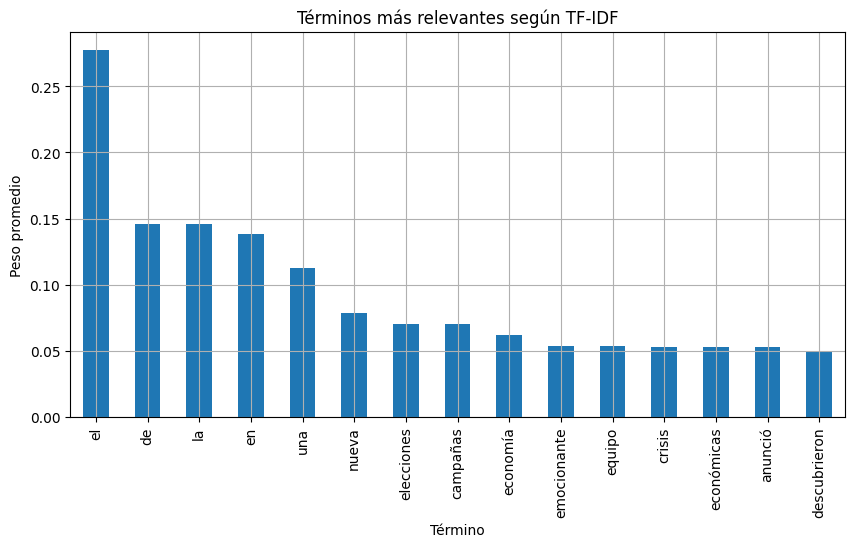

In [62]:

import matplotlib.pyplot as plt

# Promedio de importancia de cada término
term_importance = tfidf_df.mean().sort_values(ascending=False)

# Graficamos
plt.figure(figsize=(10, 5))
term_importance.head(15).plot(kind='bar')
plt.title("Términos más relevantes según TF-IDF")
plt.ylabel("Peso promedio")
plt.xlabel("Término")
plt.grid()
plt.show()


In [63]:
documents

['El presidente anunció nuevas medidas económicas para mitigar la crisis.',
 'Los científicos descubrieron una nueva especie en el Amazonas.',
 'El equipo ganó el campeonato tras una emocionante final.',
 'Una fuerte tormenta provocó daños en la costa atlántica.',
 'El congreso aprobó la nueva ley de protección de datos.',
 'Descubren fósiles de dinosaurios en el norte del país.',
 'La economía muestra señales de recuperación en el primer trimestre.',
 'Finaliza la cumbre climática con acuerdos entre países desarrollados.',
 'El nuevo teléfono inteligente revoluciona el mercado tecnológico.',
 'Inician campañas políticas rumbo a las elecciones presidenciales.']

In [57]:
import re
import spacy

In [67]:
nlp = spacy.load("es_core_news_sm")

In [74]:
def clean_text(
    text: str,
) -> str:
    """Limpia y normaliza un texto en español: minúsculas, eliminación de caracteres no alfanuméricos,
    tokenización, eliminación de *stopwords* y lematización.

    Args:
        text: Texto original a procesar.

    Returns:
        Texto limpio, tokenizado, sin *stopwords* y lematizado.

    Raises:
        ValueError: Si `text` está vacío o sólo contiene espacios.
        OSError: Si no se puede cargar el modelo de spaCy solicitado.

    Examples:
        >>> import spacy
        >>> nlp_es = spacy.load("es_core_news_sm")
        >>> clean_text("¡Los gatos corren rápidamente!", nlp=nlp_es)
        'gato correr rápidamente'
    """
    if not text or not text.strip():
        raise ValueError("`text` no debe estar vacío.")

    # Normalización: minúsculas
    text = text.lower()

    # Eliminación de caracteres no alfanuméricos (excepto espacios)
    # text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    text = re.sub(r"[^\w\s]", "", text, flags=re.UNICODE)

    # Tokenización con NLTK
    tokens = word_tokenize(text)

    # Stop words 
    stopwords_esp = stopwords.words('spanish') 
    tokens = [token for token in tokens if token not in stopwords_esp]

    # Lematización con spaCy
    doc = nlp(" ".join(tokens))
    tokens_lemma = [token.lemma_ for token in doc]

    return " ".join(tokens_lemma)


In [75]:
documents_cleaned = [clean_text(doc) for doc in documents]

In [76]:
documents_cleaned

['presidente anunciar nuevo medida económico mitigar crisis',
 'científico descubrir nuevo especie amazona',
 'equipo ganar campeonato tras emocionante final',
 'fuerte tormenta provocar daño costa atlántico',
 'congreso aprobar nuevo ley protección dato',
 'descubrir fósil dinosaurio norte país',
 'economía mostrar señal recuperación primero trimestre',
 'finalizar cumbre climático acuerdo país desarrollado',
 'nuevo teléfono inteligente revolucionar mercado tecnológico',
 'iniciar campaña política rumbo elección presidencial']

In [78]:
# Crear vectorizador TF-IDF
stopwords_esp = stopwords.words('spanish') 
vectorizer = TfidfVectorizer(stop_words=stopwords_esp)
X = vectorizer.fit_transform(documents_cleaned)

# Convertimos a DataFrame para inspección
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.head()


,acuerdo,amazona,anunciar,aprobar,atlántico,campaña,campeonato,científico,climático,congreso,...,provocar,recuperación,revolucionar,rumbo,señal,tecnológico,teléfono,tormenta,tras,trimestre
0,0.0,0.000000,0.39414,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.490297,0.00000,0.000000,0.000000,0.0,0.000000,0.490297,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.408248,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.408248,0.0
3,0.0,0.000000,0.00000,0.000000,0.408248,0.0,0.000000,0.000000,0.0,0.000000,...,0.408248,0.0,0.0,0.0,0.0,0.0,0.0,0.408248,0.000000,0.0
4,0.0,0.000000,0.00000,0.428856,0.000000,0.0,0.000000,0.000000,0.0,0.428856,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


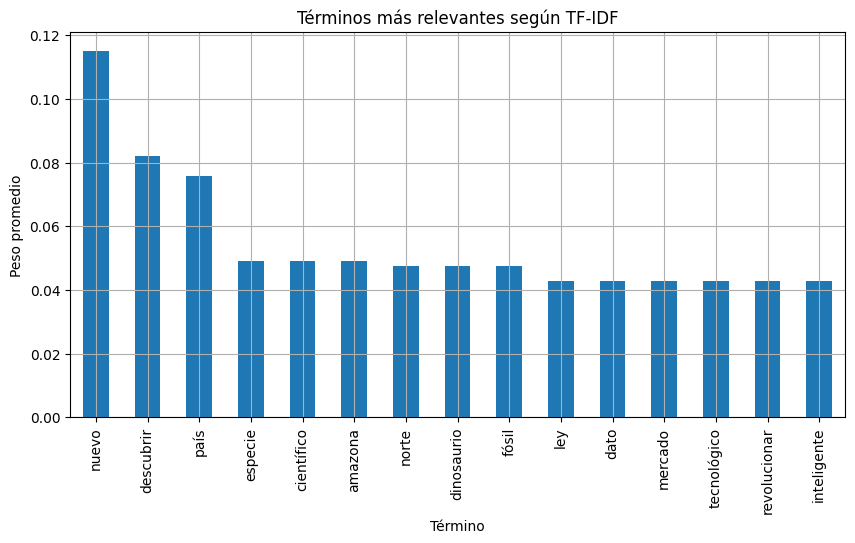

In [79]:
import matplotlib.pyplot as plt

# Promedio de importancia de cada término
term_importance = tfidf_df.mean().sort_values(ascending=False)

# Graficamos
plt.figure(figsize=(10, 5))
term_importance.head(15).plot(kind='bar')
plt.title("Términos más relevantes según TF-IDF")
plt.ylabel("Peso promedio")
plt.xlabel("Término")
plt.grid()
plt.show()

In [80]:
documents_cleaned

['presidente anunciar nuevo medida económico mitigar crisis',
 'científico descubrir nuevo especie amazona',
 'equipo ganar campeonato tras emocionante final',
 'fuerte tormenta provocar daño costa atlántico',
 'congreso aprobar nuevo ley protección dato',
 'descubrir fósil dinosaurio norte país',
 'economía mostrar señal recuperación primero trimestre',
 'finalizar cumbre climático acuerdo país desarrollado',
 'nuevo teléfono inteligente revolucionar mercado tecnológico',
 'iniciar campaña política rumbo elección presidencial']

# Usando estos procesos para modelar

## Bag of Words

In [130]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

pd.set_option('display.max_columns', None)

In [85]:
Corpus_DF = pd.read_csv('https://raw.githubusercontent.com/Izainea/nlp_ean/refs/heads/main/Datos/Datos%20Crudos/corpus_chismofilias.csv')
Corpus_DF

,Comentario,Sentimiento
0,"Me encanta usar las chismofilias, ahora estoy ...",Positivo
1,"Es increíble, escucho cosas que nunca imaginé....",Positivo
2,"La calidad del audio es sorprendente, puedo es...",Positivo
3,"La batería dura mucho tiempo, lo uso todo el d...",Positivo
4,"No puedo creer que exista algo así, es como te...",Positivo
5,"El diseño es muy discreto, nadie sospecha que ...",Positivo
6,"El alcance es limitado, no puedo escuchar lo q...",Negativo
7,"Es muy caro para lo que ofrece, esperaba más f...",Negativo
8,A veces se desconecta y pierdo lo que estaban ...,Negativo
9,"No cumple con las expectativas, el sonido es m...",Negativo


In [109]:
from sklearn.base import BaseEstimator, TransformerMixin

class CleanText(BaseEstimator, TransformerMixin):
    """Transformador de scikit-learn para limpieza y normalización de texto en español.

    Esta clase implementa el patrón de transformador de scikit-learn, permitiendo su uso
    en pipelines para preprocesar texto. Realiza:
      - Conversión a minúsculas.
      - Eliminación de caracteres no alfanuméricos.
      - Tokenización con NLTK.
      - Eliminación de stopwords en español.
      - Lematización con spaCy (`es_core_news_sm`).

    Attributes:
        nlp (spacy.language.Language): Modelo de spaCy cargado para español.
        stopwords_esp (list[str]): Lista de stopwords en español (NLTK).
    """

    # Carga del modelo de spaCy y stopwords al definir la clase
    nlp = spacy.load("es_core_news_sm")
    stopwords_esp = stopwords.words("spanish")

    def __init__(self):
        """Inicializa el transformador sin parámetros adicionales."""
        pass

    def fit(self, X: pd.Series, y=None):
        """Ajusta el transformador a los datos (sin cambios para este caso).

        Args:
            X (pd.Series): Serie de textos a procesar.
            y: Ignorado. Incluido para compatibilidad con scikit-learn.

        Returns:
            CleanText: El propio transformador (self).
        """
        return self

    def clean_text(self, text: str) -> str:
        """Limpia y normaliza un texto.

        Pasos:
            1. Convierte a minúsculas.
            2. Elimina caracteres no alfanuméricos.
            3. Tokeniza con NLTK.
            4. Elimina stopwords en español.
            5. Lematiza con spaCy.

        Args:
            text (str): Texto a limpiar.

        Returns:
            str: Texto procesado y lematizado.
        """
        # Normalización
        text = text.lower()

        # Eliminación de caracteres no alfanuméricos
        # text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
        text = re.sub(r"[^\w\s]", "", text, flags=re.UNICODE)

        # Tokenización y eliminación de stopwords
        tokens = word_tokenize(text)
        tokens = [token for token in tokens if token not in self.stopwords_esp]

        # Lematización
        doc = self.nlp(" ".join(tokens))
        tokens = [token.lemma_ for token in doc]

        return " ".join(tokens)

    def transform(self, X: pd.Series, y=None) -> pd.Series:
        """Aplica la limpieza de texto a una serie de pandas.

        Args:
            X (pd.Series): Serie de textos a procesar.
            y: Ignorado. Incluido para compatibilidad con scikit-learn.

        Returns:
            pd.Series: Serie con textos procesados.
        """
        return X.apply(self.clean_text)

    def fit_transform(self, X: pd.Series, y=None) -> pd.Series:
        """Ajusta y transforma la serie de textos.

        Args:
            X (pd.Series): Serie de textos a procesar.
            y: Ignorado. Incluido para compatibilidad con scikit-learn.

        Returns:
            pd.Series: Serie con textos procesados.
        """
        return self.transform(X)



In [110]:
cleaner = CleanText()
Corpus_cleaned = cleaner.fit_transform(Corpus_DF['Comentario'])
Corpus_cleaned

0     encantar usar chismofilia ahora día pasar veci...
1     increíble escuchar cosa nunca imaginer útil co...
2     calidad audio sorprendente poder escuchar clar...
3     batería duro tiempo uso día problema excelente...
4     poder creer exista así tener superpoder chismo...
5     diseño discreto nadie sospechar escuchar total...
6       alcance limitado poder escuchar pasar casa lado
7                   caro ofrecer esperar función precio
8               vez desconectar pierdo decir frustrante
9     cumplir expectativa sonido malo escuchar bien ...
10     pésimo producto entender tanto fama perdí dinero
11     chismofilia adictiva poder dejar usar él encanta
12     producto hecho feliz ahora saber pasar alrededor
13            tanto bueno pintir barato funcionar deber
14       gustar forma divertido pasar tiempo enterar yo
Name: Comentario, dtype: object

In [131]:
count_vectorizer = CountVectorizer()
Corpus_vectorized = count_vectorizer.fit_transform(Corpus_cleaned)

Corpus_tfidf_df = pd.DataFrame(Corpus_vectorized.toarray(), columns=count_vectorizer.get_feature_names_out())
Corpus_tfidf_df.head()

,adictiva,ahora,alcance,alrededor,así,audio,barato,batería,bien,bueno,calidad,caro,casa,chismofilia,chismosear,claridad,compra,conocer,cosa,creer,cumplir,deber,decir,dejar,desconectar,dinero,discreto,diseño,divertido,duro,día,encanta,encantar,entender,enterar,escuchar,esperar,excelente,exista,expectativa,fama,feliz,forma,frustrante,funcionar,función,gran,gustar,hecho,imaginer,increíble,lado,limitado,malo,nadie,nunca,ofrecer,pasar,perdí,pierdo,pintir,poder,precio,problema,producto,pésimo,recomendado,saber,sonido,sorprendente,sospechar,superpoder,tanto,tener,tiempo,totalmente,usar,uso,vecindario,vecino,vez,yo,él,útil
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [115]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(Corpus_vectorized, Corpus_DF['Sentimiento']=='Positivo')


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [132]:
y_pred = random_forest_classifier.predict(Corpus_vectorized)
print(classification_report(Corpus_DF['Sentimiento']=='Positivo', y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00         6
        True       1.00      1.00      1.00         9

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [168]:
texto = cleaner.transform(pd.DataFrame(['Es muy caro y tiene poco alcance, es frustrante'])[0])
texto

0    caro alcance frustrante
Name: 0, dtype: object

In [169]:
vector = count_vectorizer.transform(texto)

pd.DataFrame(vector.toarray(), columns=count_vectorizer.get_feature_names_out())

,adictiva,ahora,alcance,alrededor,así,audio,barato,batería,bien,bueno,calidad,caro,casa,chismofilia,chismosear,claridad,compra,conocer,cosa,creer,cumplir,deber,decir,dejar,desconectar,dinero,discreto,diseño,divertido,duro,día,encanta,encantar,entender,enterar,escuchar,esperar,excelente,exista,expectativa,fama,feliz,forma,frustrante,funcionar,función,gran,gustar,hecho,imaginer,increíble,lado,limitado,malo,nadie,nunca,ofrecer,pasar,perdí,pierdo,pintir,poder,precio,problema,producto,pésimo,recomendado,saber,sonido,sorprendente,sospechar,superpoder,tanto,tener,tiempo,totalmente,usar,uso,vecindario,vecino,vez,yo,él,útil
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [170]:
random_forest_classifier.predict(vector)

array([False])

### Usando un pipeline

In [119]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('cleaner', CleanText()),
    ('vectorizer', CountVectorizer()),
    ('classifier', RandomForestClassifier())
])

In [120]:
pipeline.fit(Corpus_DF['Comentario'], Corpus_DF['Sentimiento']=='Positivo')

,steps,"[('cleaner', ...), ('vectorizer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [121]:
y_pred = pipeline.predict(Corpus_DF['Comentario'])

In [ ]:
print(classification_report(Corpus_DF['Sentimiento']=='Positivo', y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00         6
        True       1.00      1.00      1.00         9

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [164]:
pipeline.predict(pd.DataFrame(['Las chismofilias son lo mejor que me ha pasado'])[0])

array([ True])

In [165]:
pipeline.predict(pd.DataFrame(['Es muy caro y tiene poco alcance, es frustrante'])[0])

array([False])

## TF-IDF

In [140]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipeline_2 = Pipeline([
    ('cleaner', CleanText()),
    ('vectorizer', TfidfVectorizer(stop_words=stopwords_esp)),
    ('classifier', RandomForestClassifier())
])

In [142]:
pipeline_2.fit(Corpus_DF['Comentario'], Corpus_DF['Sentimiento']=='Positivo')

,steps,"[('cleaner', ...), ('vectorizer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [143]:
y_pred_2 = pipeline_2.predict(Corpus_DF['Comentario'])

In [ ]:
print(classification_report(Corpus_DF['Sentimiento']=='Positivo', y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00         6
        True       1.00      1.00      1.00         9

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [147]:
pipeline_2.predict(pd.DataFrame(['Las chismofilias son lo mejor que me ha pasado'])[0])

array([ True])

In [163]:
pipeline_2.predict(pd.DataFrame(['Es muy caro y tiene poco alcance, es frustrante'])[0])

array([False])